# Multiple Linear Regression and Gradient Descent

## Multiple Linear Regression Model

The multiple linear regression model is defined as:

$$
f_{w,b}(x) = w_1x_1 + w_2x_2 + \dots + w_nx_n + b = \sum_{j=1}^{n} w_jx_j + b
$$

Where:
- $w_1, w_2, \dots, w_n$ are the weights (coefficients) for each feature.
- $b$ is the bias (y-intercept).
- $x_1, x_2, \dots, x_n$ are the input features.

## Cost Function

The cost function $J(w,b)$ for multiple linear regression is given by:

$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)^2
$$

Where:
- $m$ is the number of training examples.
- $x^{(i)} = [x_1^{(i)}, x_2^{(i)}, \dots, x_n^{(i)}]$ is the feature vector for the $i$-th training example.
- $y^{(i)}$ is the $i$-th target output.

## Gradient Descent Algorithm

The gradient descent algorithm is used to minimize the cost function:

$$
w_j = w_j - \alpha \frac{\partial}{\partial w_j} J(w,b) \quad \text{for } j = 1, 2, \dots, n
$$

$$
b = b - \alpha \frac{\partial}{\partial b} J(w,b)
$$

Where:
- $\alpha$ is the learning rate.
- $\frac{\partial}{\partial w_j} J(w,b)$ is the partial derivative of $J$ with respect to $w_j$.
- $\frac{\partial}{\partial b} J(w,b)$ is the partial derivative of $J$ with respect to $b$.

The partial derivatives are calculated as:

$$
\frac{\partial}{\partial w_j} J(w,b) = \frac{1}{m} \sum_{i=1}^{m} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

$$
\frac{\partial}{\partial b} J(w,b) = \frac{1}{m} \sum_{i=1}^{m} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)
$$

These formulas are used to update the parameters $w_j$ and $b$ in each iteration of the gradient descent algorithm.


In [6]:
%pip install numpy
%pip install matplotlib

  Using cached numpy-2.1.0-cp310-cp310-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached numpy-2.1.0-cp310-cp310-macosx_14_0_arm64.whl (5.4 MB)

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached contourpy-1.2.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 28.1 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.2.1-cp310-cp310-macosx_11_0_arm64.whl (244 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp310-cp310-macosx_11_0_arm64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp310-cp310-macosx_11_0_arm64.whl 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

Matplotlib is building the font cache; this may take a moment.


In [36]:
class MultipleLinearRegression:
    def __init__(self, x_train, y_train):
        """
        Initializes the Multiple Linear Regression model with training data.

        Parameters:
        - x_train: Matrix of input features.
        - y_train: Array of corresponding target values.
        """
        self.x_train = x_train
        self.y_train = y_train
        self.b_in = 0
        self.m = len(y_train)  # Number of training examples
        self.w_in = np.zeros(len(self.x_train[0]))  # Initialize the weight with zeros

    def cost_function(self, w, b):
        """
        Computes the cost function for multiple linear regression, which measures the difference between
        predicted values and actual values.

        The cost function used here is Mean Squared Error (MSE).

        Parameters:
        - w: Weight matrix for the multiple linear regression model.
        - b: Bias for the linear regression model.

        Returns:
        - The computed cost (MSE).
        """
        total_cost = 0

        # Sum of squared differences between predicted and actual values
        for i in range(self.m):
            y_predicted = np.dot(self.x_train[i], w) + b
            total_cost += (y_predicted - self.y_train[i]) ** 2

        # Return the mean of the squared differences
        return (1 / (2 * self.m)) * total_cost

    def compute_prediction_array(self, w, b):
        """
        Computes the predicted values (y_hat) for the training set using the current weight and bias.

        Parameters:
        - w: Weight matrix for the multiple linear regression model.
        - b: Bias for the linear regression model.

        Returns:
        - An array of predicted values for each training example.
        """
        result = np.zeros(self.m)
        for i in range(self.m):
            result[i] = np.dot(self.x_train[i], w) + b

        return result

    def gradient_w(self, w, b):
        """
        Computes the gradient of the cost function with respect to the weight matrix(w).
        This gradient indicates how much the cost would change with a small change in the weight.

        Parameters:
        - w: Current weight matrix value.
        - b: Current bias value.

        Returns:
        - The gradient vector for the weight matrix.
        """
        gradient_value = np.zeros(len(self.x_train[0]))

        for i in range(self.m):
            y_predicted = np.dot(self.x_train[i], w) + b
            for j in range(len(self.x_train[0])):  
                gradient_value[j] += (y_predicted - self.y_train[i]) * self.x_train[i][j]
                
        # Average gradient over all training examples
        return (1 / self.m) * gradient_value

    def gradient_b(self, w, b):
        """
        Computes the gradient of the cost function with respect to the bias (b).
        This gradient indicates how much the cost would change with a small change in the bias.

        Parameters:
        - w: Current weight value.
        - b: Current bias value.

        Returns:
        - The gradient value for the bias.
        """
        gradient_value = 0

        for i in range(self.m):
            y_predicted = np.dot(self.x_train[i], w) + b
            gradient_value += y_predicted - self.y_train[i]

        # Average gradient over all training examples
        return (1 / self.m) * gradient_value

    def gradient_descent(self, iterations=1200, learning_rate=0.01):
        """
        Performs the gradient descent optimization to find the optimal values of weight matrix(w) and bias (b)
        that minimize the cost function.

        Parameters:
        - iterations: Number of iterations to run the gradient descent (default is 1200).
        - learning_rate: Step size for each iteration of gradient descent (default is 0.01).

        Returns:
        - Optimized weight matrix (w_optimised) and bias (b_optimised).
        """
        w_optimised = copy.deepcopy(self.w_in)  # Initialize the optimized weight matrix with the initial value
                                                #avoid modifying global w within function, so use deepcopy
        b_optimised = self.b_in  # Initialize the optimized bias with the initial value

        for i in range(iterations):
            # Compute gradients for weight matrix and bias
            dj_dw = self.gradient_w(w_optimised, b_optimised)
            dj_db = self.gradient_b(w_optimised, b_optimised)

            # Update the weight and bias by moving in the opposite direction of the gradients
            temp_w = w_optimised - learning_rate * dj_dw
            temp_b = b_optimised - learning_rate * dj_db

            # Assign the updated values back to the optimized variables
            w_optimised = temp_w
            b_optimised = temp_b

            # Print the progress every 100 iterations
            if (i + 1) % 10 == 0:
                print(f"After {i + 1} iterations: w -> {w_optimised}      b -> {b_optimised}.       cost -> {self.cost_function(w_optimised, b_optimised)}")
                # Plot the cost function value for each iteration
                plt.scatter(i, self.cost_function(w_optimised, b_optimised), color='blue')
                

        return w_optimised, b_optimised




After 10 iterations: w -> [10.25477489 10.59145622 -3.80195601 10.0541243 ]      b -> 27.729198247446696.       cost -> 38556.85607285975
After 20 iterations: w -> [17.79592482 18.43682317 -7.02415617 17.42334223]      b -> 52.80698809680305.       cost -> 30476.57648005707
After 30 iterations: w -> [23.33684549 24.2526269  -9.77832912 22.81582603]      b -> 75.48689171739868.       cost -> 24349.774721591537
After 40 iterations: w -> [ 27.40383232  28.56799134 -12.15080906  26.7537941 ]      b -> 95.99819001479266.       cost -> 19601.29115593317
After 50 iterations: w -> [ 30.38510773  31.77369469 -14.20881374  29.62225941]      b -> 114.54824053011437.       cost -> 15860.589386995209
After 60 iterations: w -> [ 32.56700563  34.15838019 -16.00511411  31.7050061 ]      b -> 131.32457370667913.       cost -> 12879.024813900942
After 70 iterations: w -> [ 34.16067683  35.93528531 -17.58151354  33.21113949]      b -> 146.49678871593989.       cost -> 10482.876923006292
After 80 iteratio

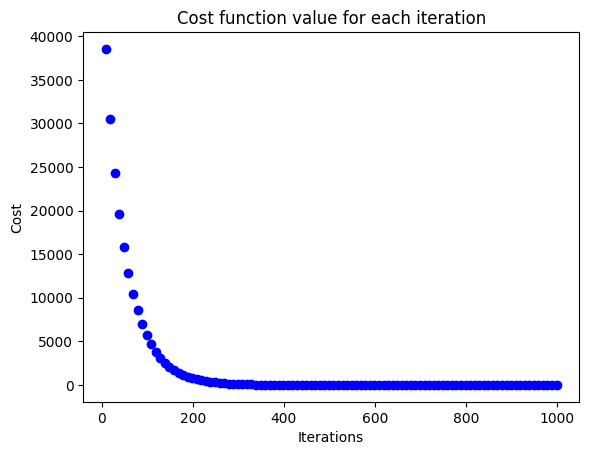

In [38]:
# Training data
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

# Normalize the training data using min-max scaling
x_train_min_max_scale = (x_train - x_train.min(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0))

# Normalize the training data using z-score normalization
x_train_z_score = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)

# Initialize the Linear Regression model
model = MultipleLinearRegression(x_train_z_score, y_train)


# Perform gradient descent to find the optimal weight and bias
w, b = model.gradient_descent(iterations=1000, learning_rate=0.01)

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function value for each iteration')
plt.show()
